In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from interpolazione import Interpolazione, final_val

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'malus.csv'
fr = pd.read_csv(FILE)

In [9]:
α = np.array(fr['teta (deg)']) * np.pi / 180 # rad
V = np.array(fr['V (Volt)']) # Volt
I = np.array(fr['I (mA)']) # Ampere
sigmaI = np.array(fr['sigmaI']) # Ampere
sigmaV = np.array(fr['sigmaV']) # Volt

In [10]:
def legge_malus(α,I0,offset):
    return I0 * np.cos(α + offset)**2

def campo_polarizzato(α,E0,offset):
    return E0 * np.cos(α + offset)

In [11]:
malus_E = Interpolazione(α, V, campo_polarizzato, sigmaV,[0,0])
malus_I = Interpolazione(α, I, legge_malus, sigmaI,[0,0])

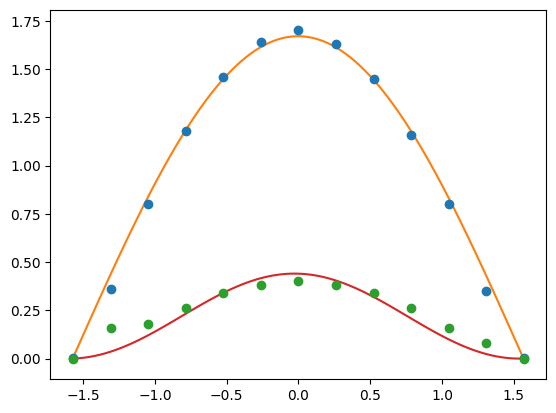

In [13]:
plt.errorbar(α, V, yerr=sigmaV, fmt='o', label='data')
plt.plot(malus_E.x_best,malus_E.y_best, label='fit')
plt.errorbar(α, I, yerr=sigmaI, fmt='o', label='data')
plt.plot(malus_I.x_best,malus_I.y_best, label='fit')
plt.show()